<a href="https://colab.research.google.com/github/Chasith-Randima/tensorflow_models/blob/main/superviced_learning_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df = pd.read_csv("./magic04.data",names=cols)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"]=="g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

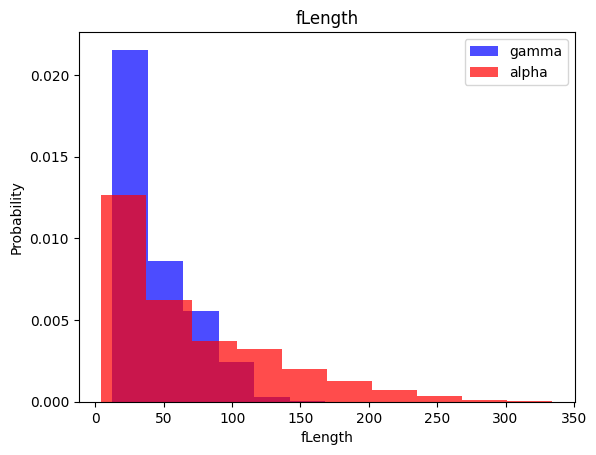

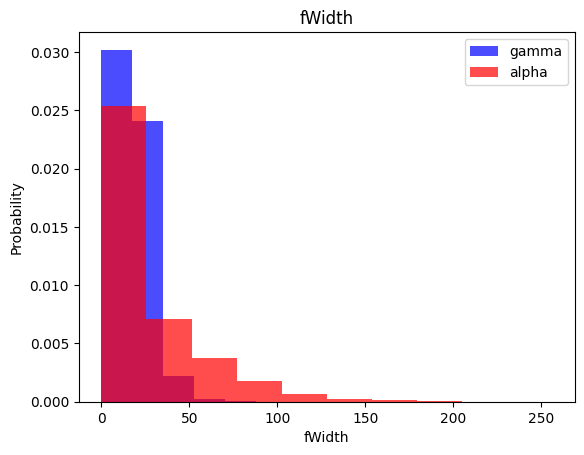

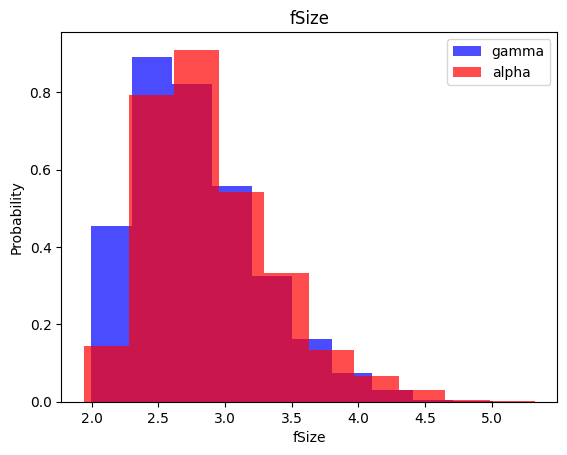

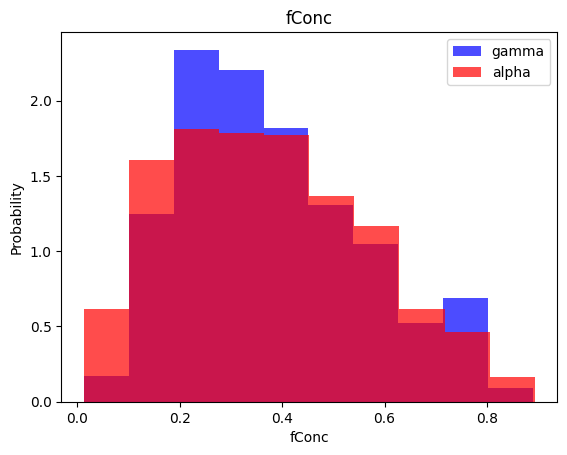

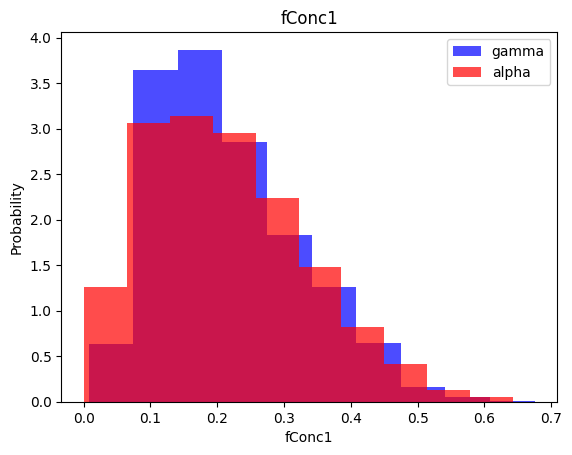

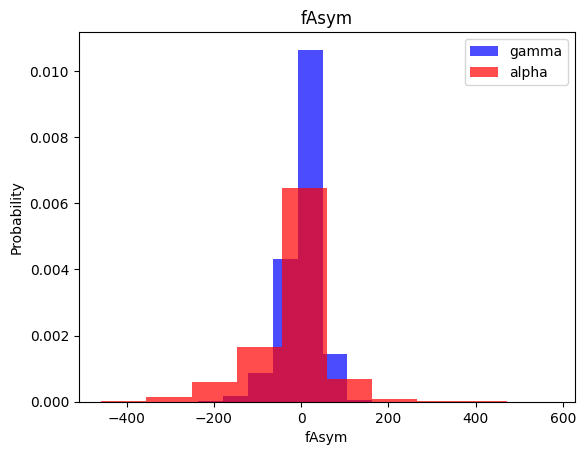

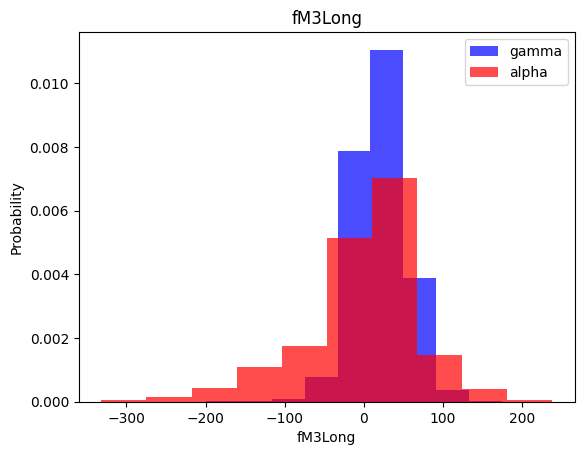

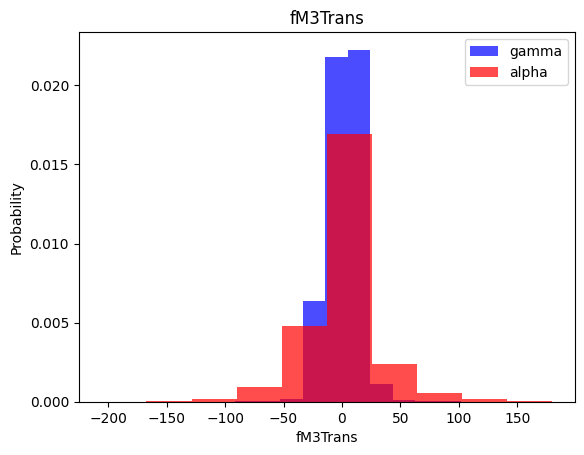

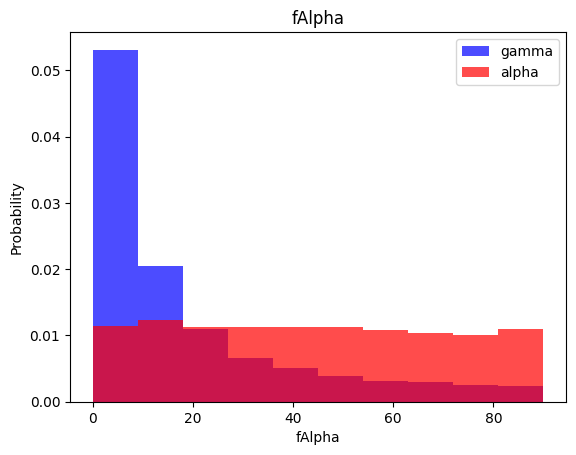

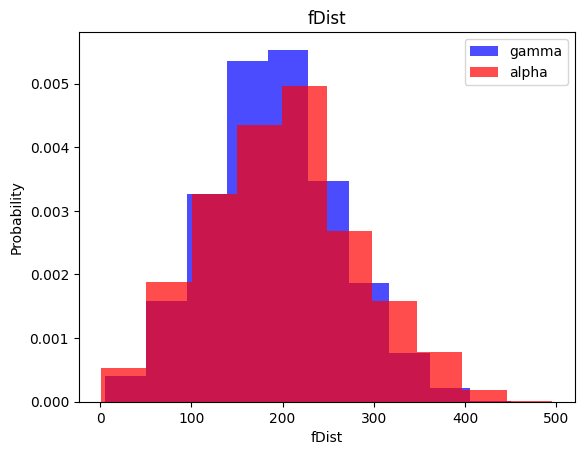

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="alpha",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7378
4034


In [ ]:
# train,X_train,y_train = scale_dataset(train,oversample=True)

In [ ]:
len(y_train)

NameError: ignored

In [ ]:
sum(y_train == 1)

In [ ]:
sum(y_train == 0)

In [ ]:
train,X_train,y_train = scale_dataset(train,oversample=True)
valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
test,X_test,y_test = scale_dataset(test,oversample=True)

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred[:10]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      2170
           1       0.87      0.76      0.81      2836

    accuracy                           0.80      5006
   macro avg       0.80      0.81      0.80      5006
weighted avg       0.81      0.80      0.80      5006



In [ ]:
#Naive Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.41      0.54      2503
           1       0.61      0.91      0.73      2503

    accuracy                           0.66      5006
   macro avg       0.71      0.66      0.64      5006
weighted avg       0.71      0.66      0.64      5006



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2503
           1       0.76      0.83      0.79      2503

    accuracy                           0.78      5006
   macro avg       0.78      0.78      0.78      5006
weighted avg       0.78      0.78      0.78      5006



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2503
           1       0.82      0.89      0.86      2503

    accuracy                           0.85      5006
   macro avg       0.85      0.85      0.85      5006
weighted avg       0.85      0.85      0.85      5006



In [ ]:
#Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy",metrics="accuracy")


In [ ]:
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
369/369 [==============================] - 8s 5ms/step - loss: 0.4513 - accuracy: 0.7907 - val_loss: 0.5756 - val_accuracy: 0.6724
Epoch 2/100
369/369 [==============================] - 2s 4ms/step - loss: 0.3726 - accuracy: 0.8406 - val_loss: 0.4880 - val_accuracy: 0.7524
Epoch 3/100
369/369 [==============================] - 2s 4ms/step - loss: 0.3541 - accuracy: 0.8517 - val_loss: 0.5387 - val_accuracy: 0.7243
Epoch 4/100
369/369 [==============================] - 2s 4ms/step - loss: 0.3430 - accuracy: 0.8575 - val_loss: 0.4870 - val_accuracy: 0.7429
Epoch 5/100
369/369 [==============================] - 1s 4ms/step - loss: 0.3371 - accuracy: 0.8580 - val_loss: 0.4561 - val_accuracy: 0.7659
Epoch 6/100
369/369 [==============================] - 2s 4ms/step - loss: 0.3325 - accuracy: 0.8604 - val_loss: 0.4874 - val_accuracy: 0.7388
Epoch 7/100
369/369 [==============================] - 2s 5ms/step - loss: 0.3288 - accuracy: 0.8611 - val_loss: 0.4810 - val_accuracy: 0.7470

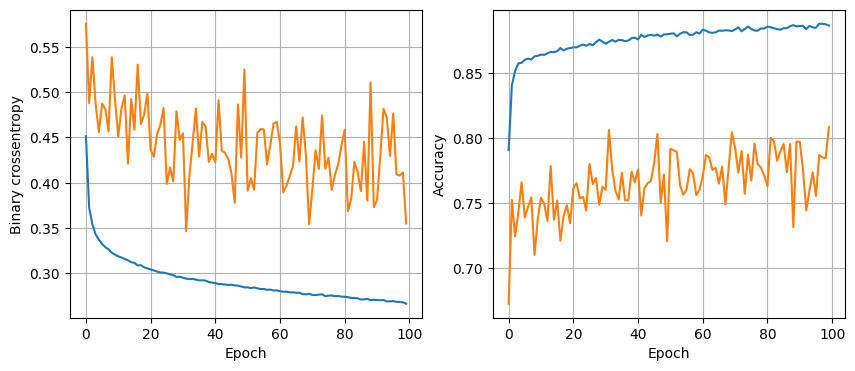

In [ ]:
plot_history(history)

In [ ]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="binary_crossentropy",metrics="accuracy")

  history = nn_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
  )

  return nn_model,history

16-nodes | 0-dropout_prob | 0.01-lr | 32-batch size


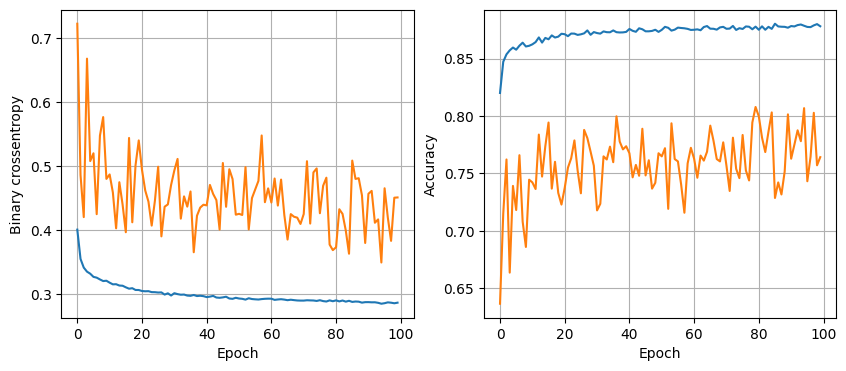

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8675
16-nodes | 0-dropout_prob | 0.01-lr | 64-batch size


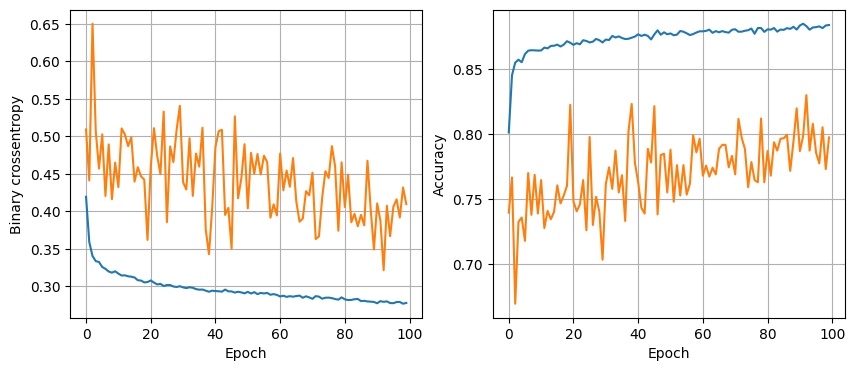

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8672
16-nodes | 0-dropout_prob | 0.01-lr | 128-batch size


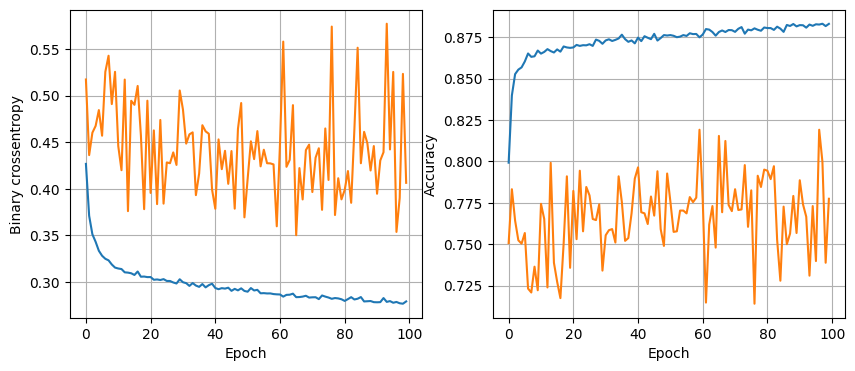

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8678
16-nodes | 0-dropout_prob | 0.005-lr | 32-batch size


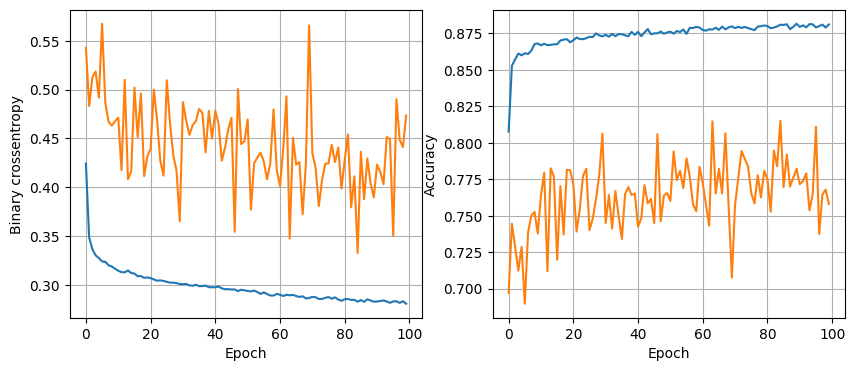

119/119 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8722
16-nodes | 0-dropout_prob | 0.005-lr | 64-batch size


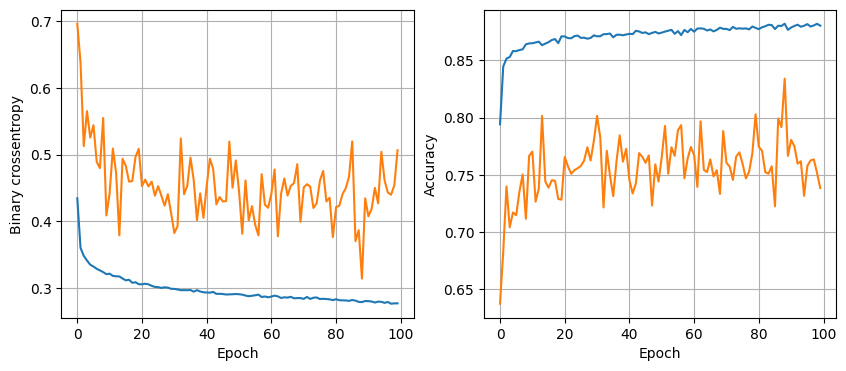

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8699
16-nodes | 0-dropout_prob | 0.005-lr | 128-batch size


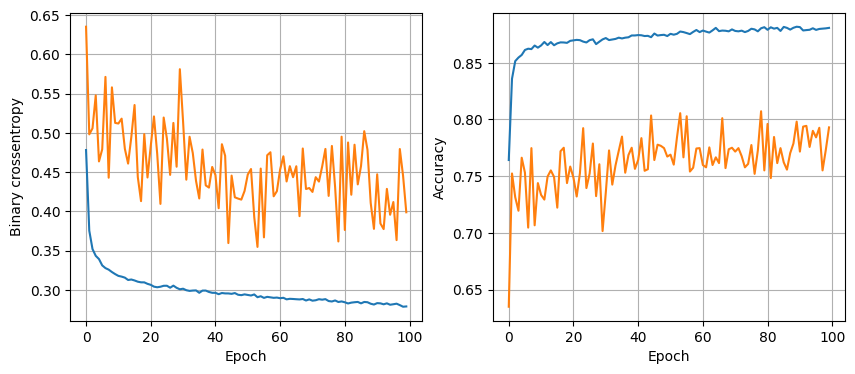

119/119 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8749
16-nodes | 0-dropout_prob | 0.001-lr | 32-batch size


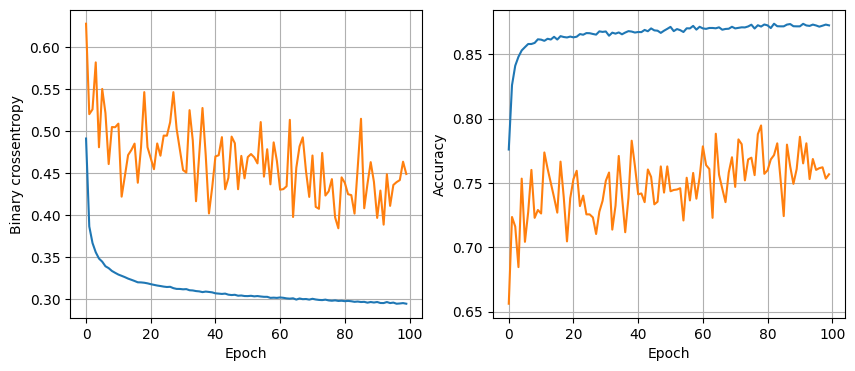

119/119 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8764
16-nodes | 0-dropout_prob | 0.001-lr | 64-batch size


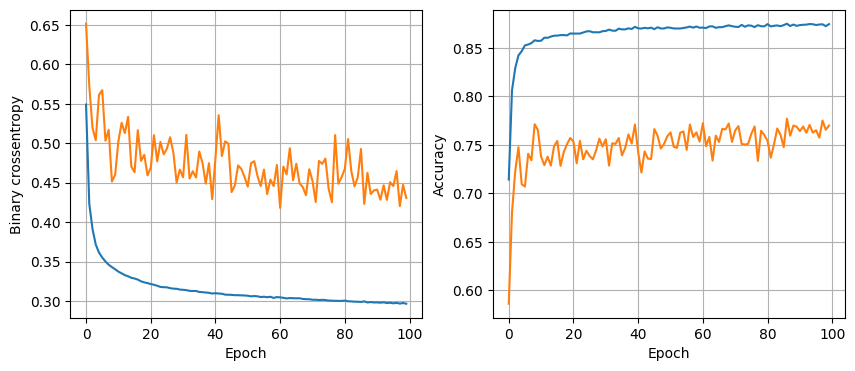

119/119 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8725
16-nodes | 0-dropout_prob | 0.001-lr | 128-batch size


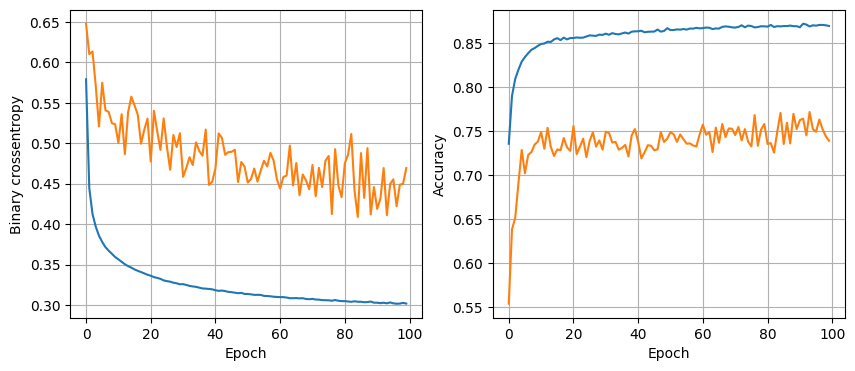

119/119 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8691
16-nodes | 0.2-dropout_prob | 0.01-lr | 32-batch size


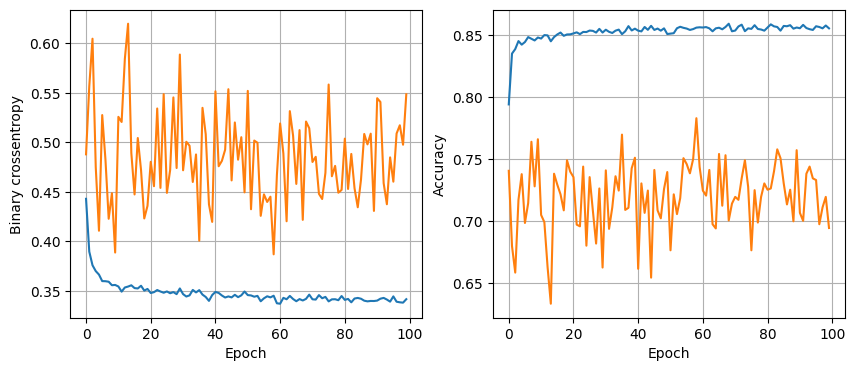

119/119 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8683
16-nodes | 0.2-dropout_prob | 0.01-lr | 64-batch size


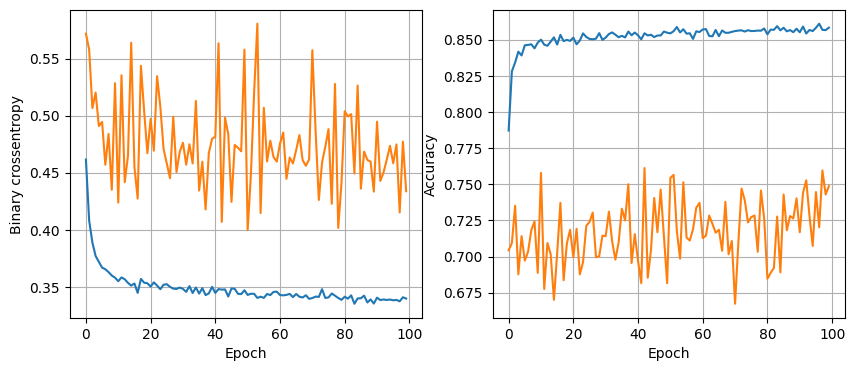

119/119 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8662
16-nodes | 0.2-dropout_prob | 0.01-lr | 128-batch size


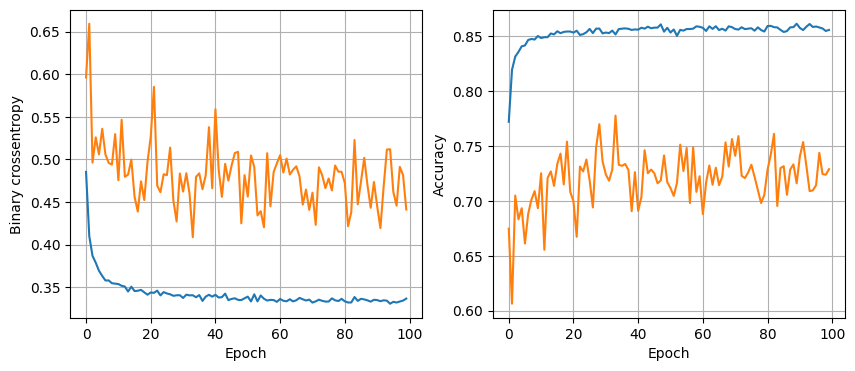

119/119 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8691
16-nodes | 0.2-dropout_prob | 0.005-lr | 32-batch size


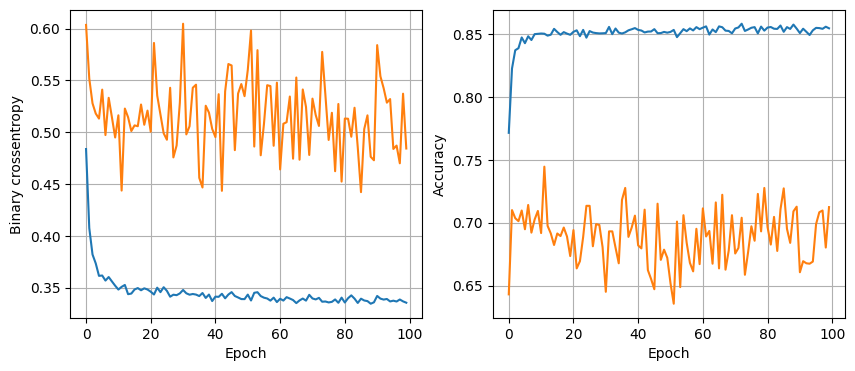

119/119 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8649
16-nodes | 0.2-dropout_prob | 0.005-lr | 64-batch size


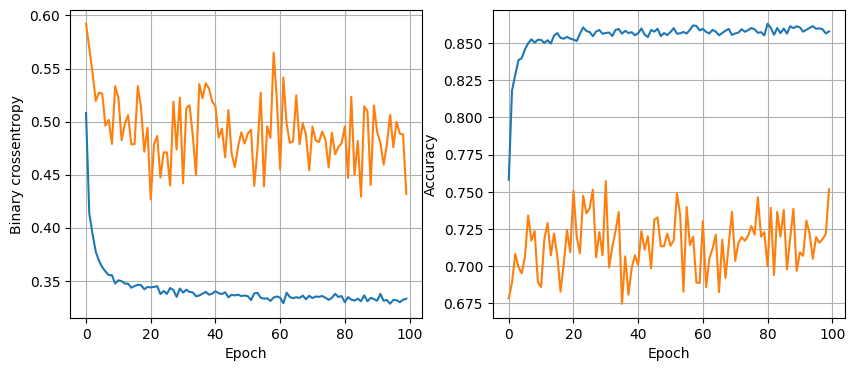

119/119 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.8699
16-nodes | 0.2-dropout_prob | 0.005-lr | 128-batch size


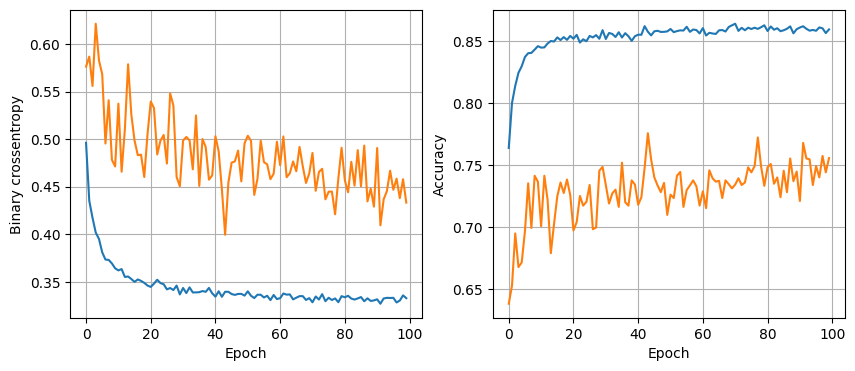

119/119 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8644
16-nodes | 0.2-dropout_prob | 0.001-lr | 32-batch size


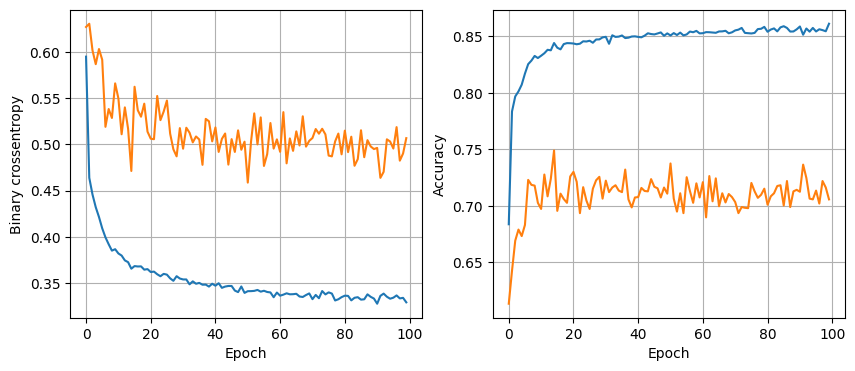

119/119 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8696
16-nodes | 0.2-dropout_prob | 0.001-lr | 64-batch size


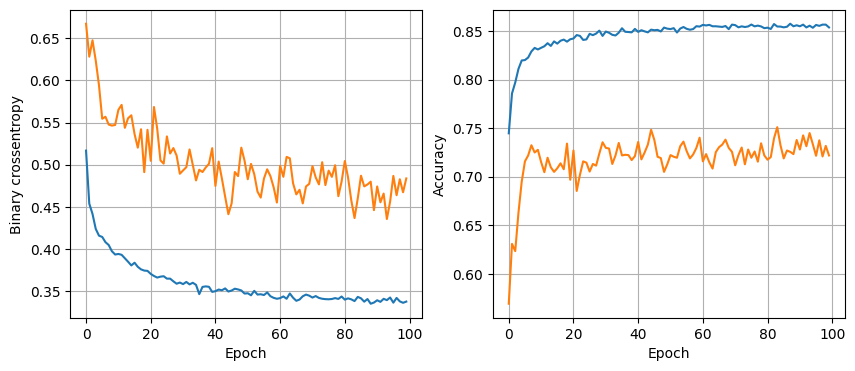

119/119 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8707
16-nodes | 0.2-dropout_prob | 0.001-lr | 128-batch size


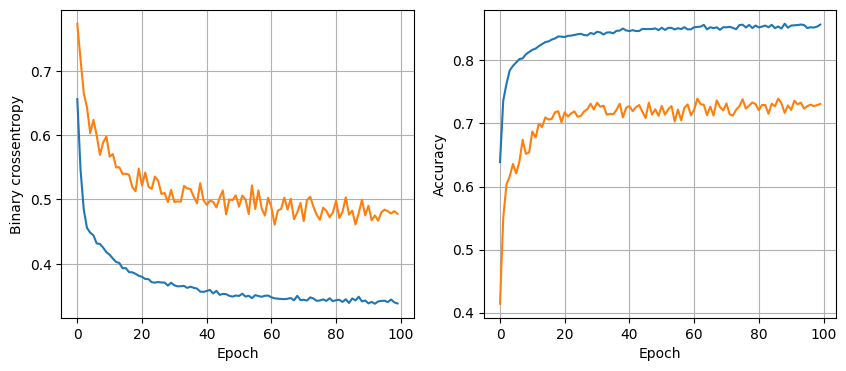

119/119 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8686
32-nodes | 0-dropout_prob | 0.01-lr | 32-batch size


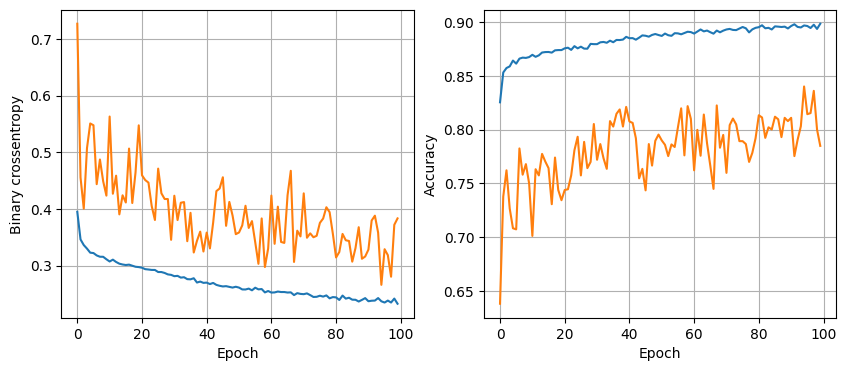

119/119 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8675
32-nodes | 0-dropout_prob | 0.01-lr | 64-batch size


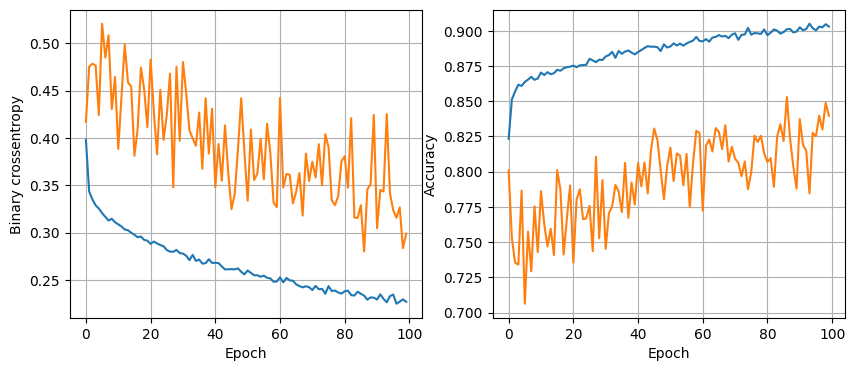

119/119 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8604
32-nodes | 0-dropout_prob | 0.01-lr | 128-batch size


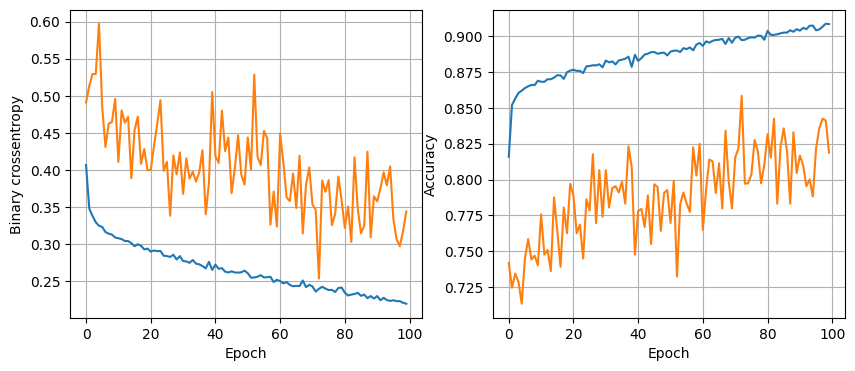

119/119 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8636
32-nodes | 0-dropout_prob | 0.005-lr | 32-batch size


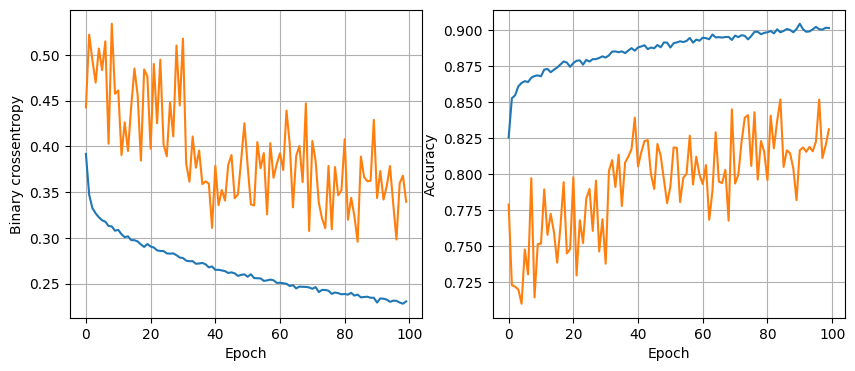

119/119 [==============================] - 0s 3ms/step - loss: 0.3712 - accuracy: 0.8704
32-nodes | 0-dropout_prob | 0.005-lr | 64-batch size


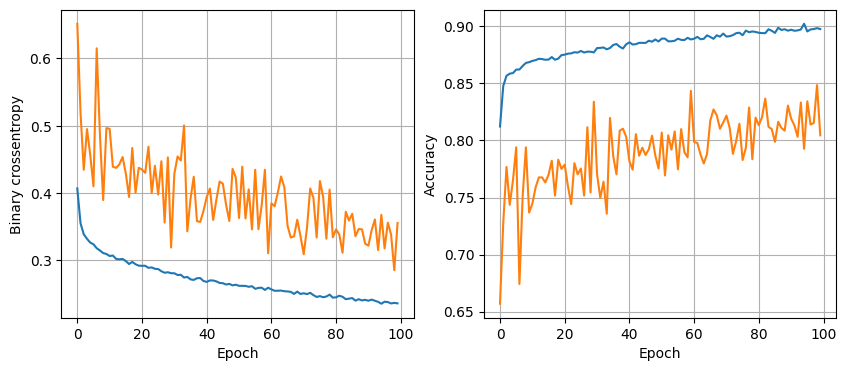

119/119 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8704
32-nodes | 0-dropout_prob | 0.005-lr | 128-batch size


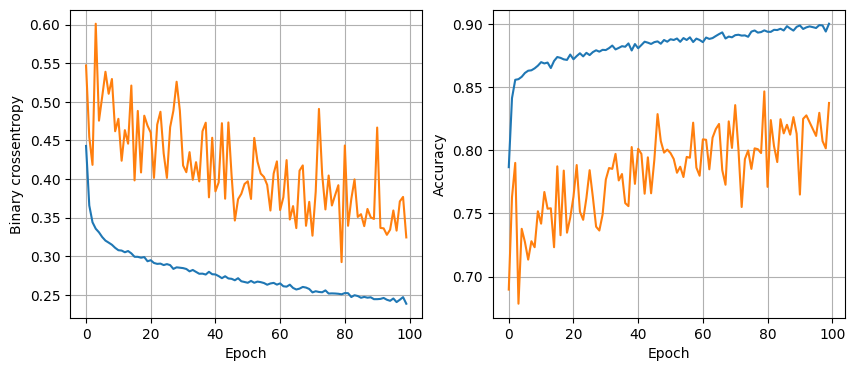

119/119 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8636
32-nodes | 0-dropout_prob | 0.001-lr | 32-batch size


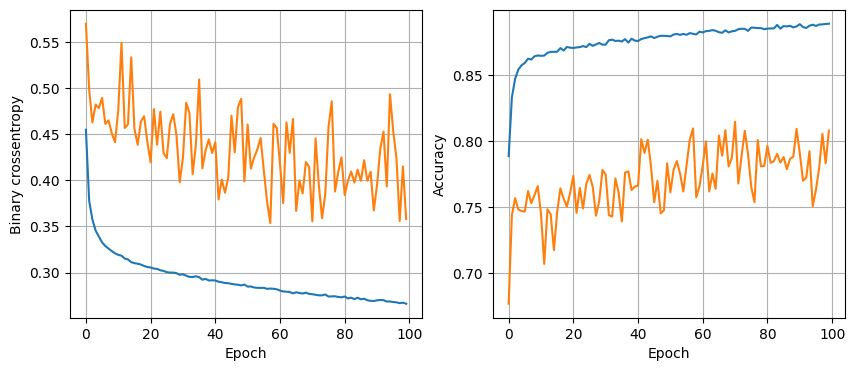

119/119 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8712
32-nodes | 0-dropout_prob | 0.001-lr | 64-batch size


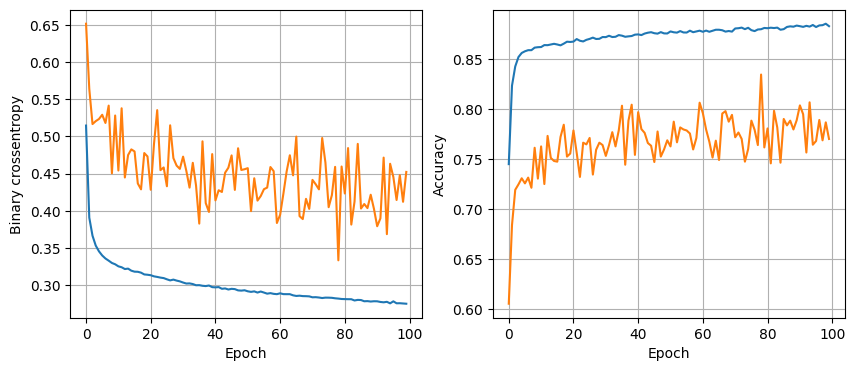

119/119 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8743
32-nodes | 0-dropout_prob | 0.001-lr | 128-batch size


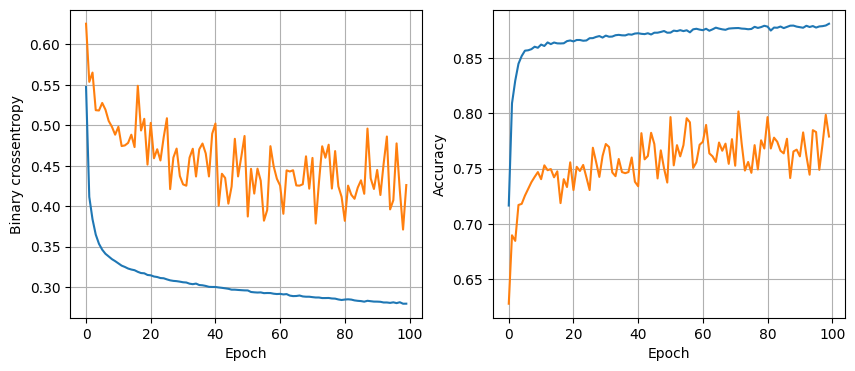

119/119 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8757
32-nodes | 0.2-dropout_prob | 0.01-lr | 32-batch size


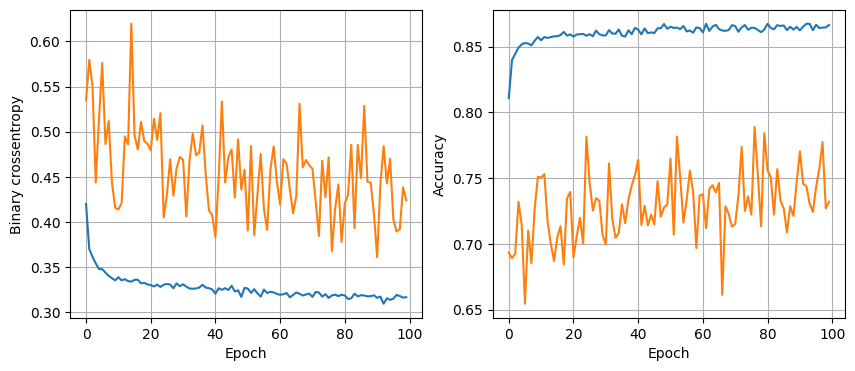

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8709
32-nodes | 0.2-dropout_prob | 0.01-lr | 64-batch size


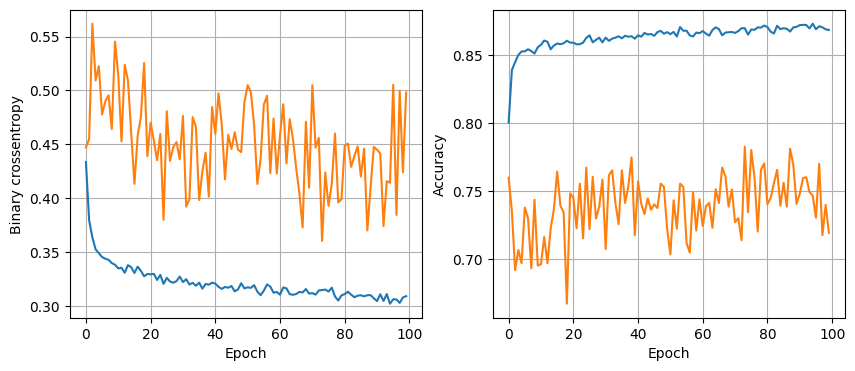

119/119 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8672
32-nodes | 0.2-dropout_prob | 0.01-lr | 128-batch size


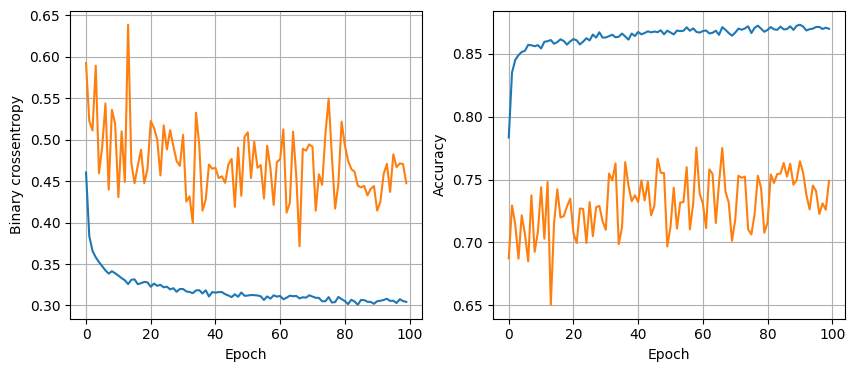

119/119 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8707
32-nodes | 0.2-dropout_prob | 0.005-lr | 32-batch size


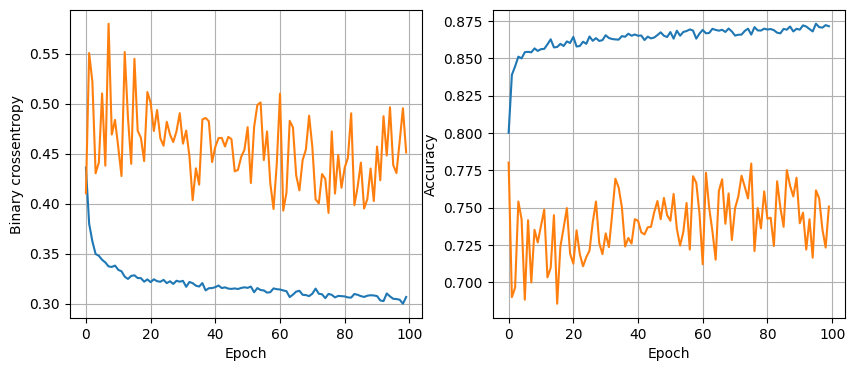

119/119 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8725
32-nodes | 0.2-dropout_prob | 0.005-lr | 64-batch size


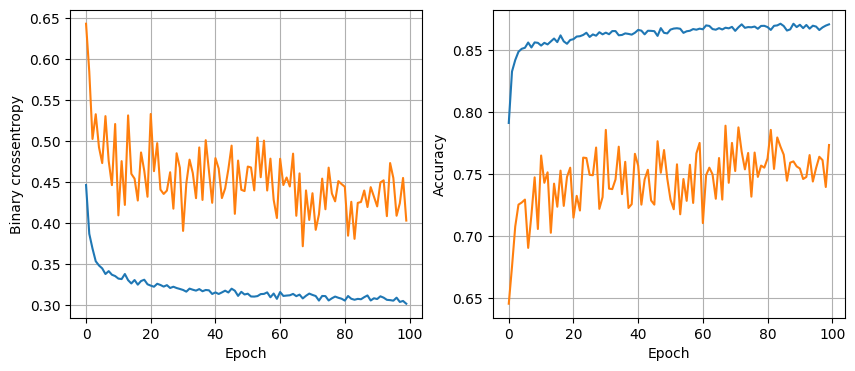

119/119 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8743
32-nodes | 0.2-dropout_prob | 0.005-lr | 128-batch size


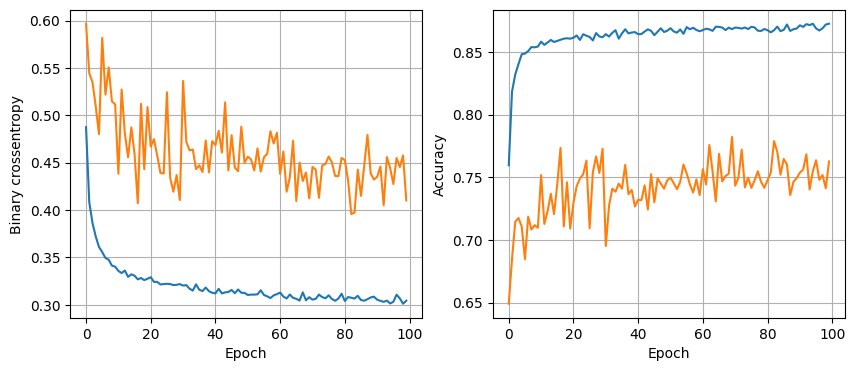

119/119 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8712
32-nodes | 0.2-dropout_prob | 0.001-lr | 32-batch size


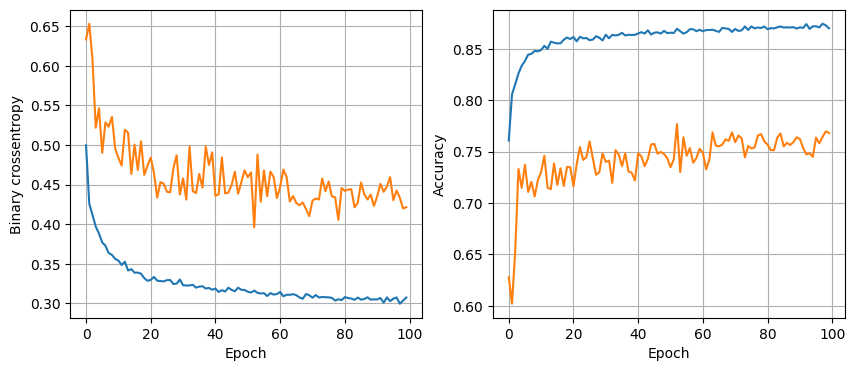

119/119 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8754
32-nodes | 0.2-dropout_prob | 0.001-lr | 64-batch size


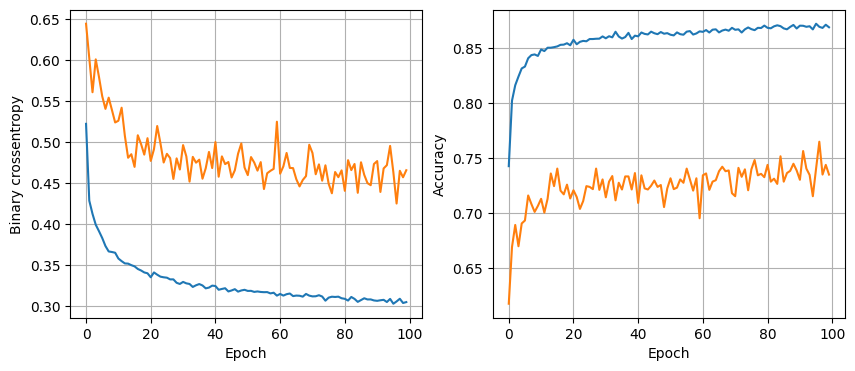

119/119 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8759
32-nodes | 0.2-dropout_prob | 0.001-lr | 128-batch size


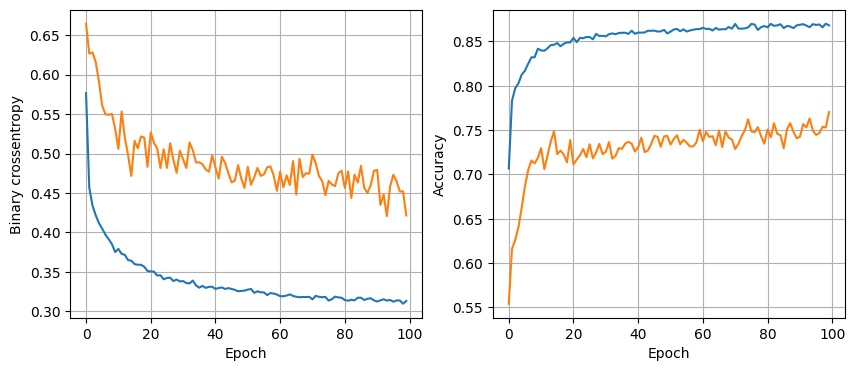

119/119 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8738
64-nodes | 0-dropout_prob | 0.01-lr | 32-batch size


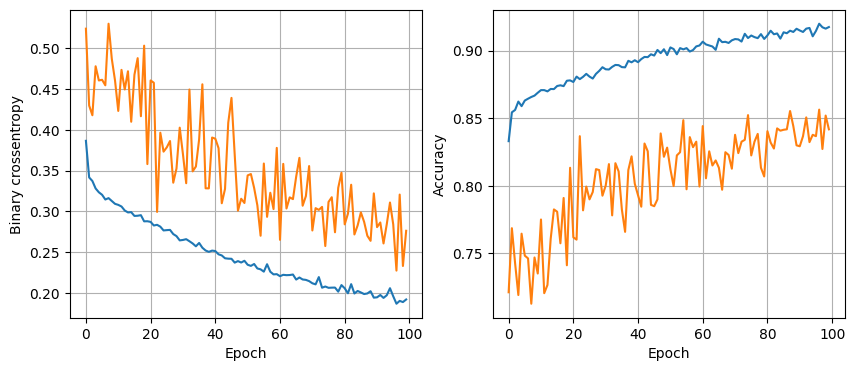

119/119 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.8649
64-nodes | 0-dropout_prob | 0.01-lr | 64-batch size


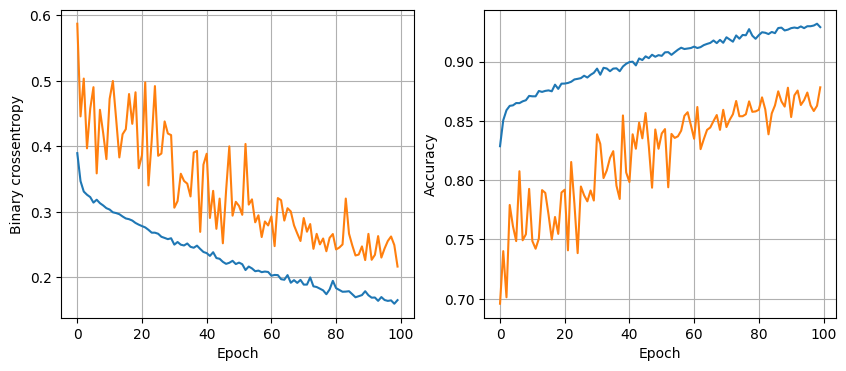

119/119 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.8649
64-nodes | 0-dropout_prob | 0.01-lr | 128-batch size


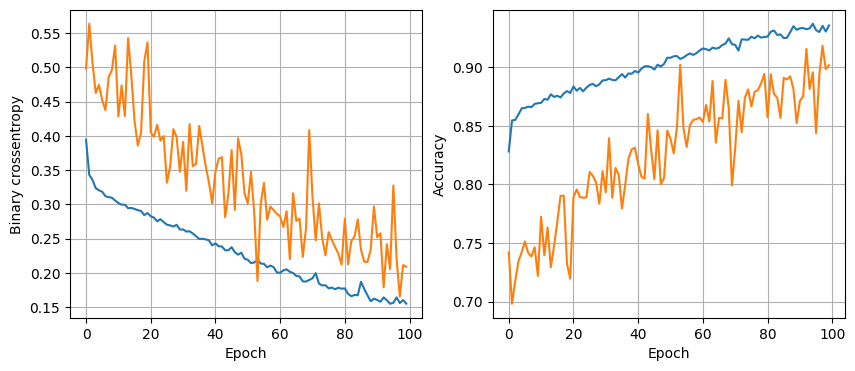

119/119 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.8544
64-nodes | 0-dropout_prob | 0.005-lr | 32-batch size


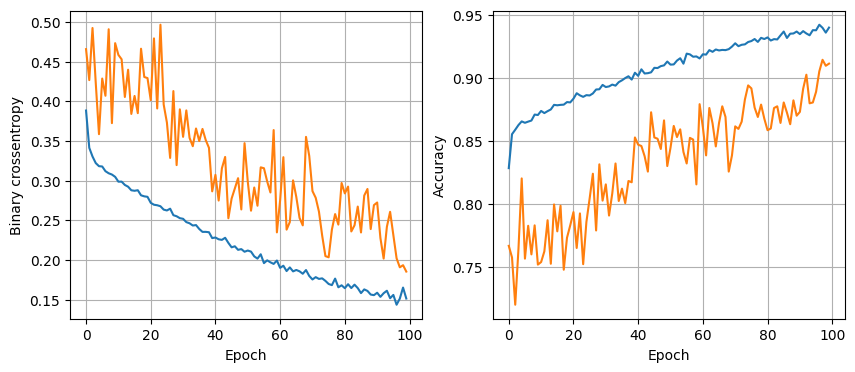

119/119 [==============================] - 0s 3ms/step - loss: 0.6118 - accuracy: 0.8541
64-nodes | 0-dropout_prob | 0.005-lr | 64-batch size


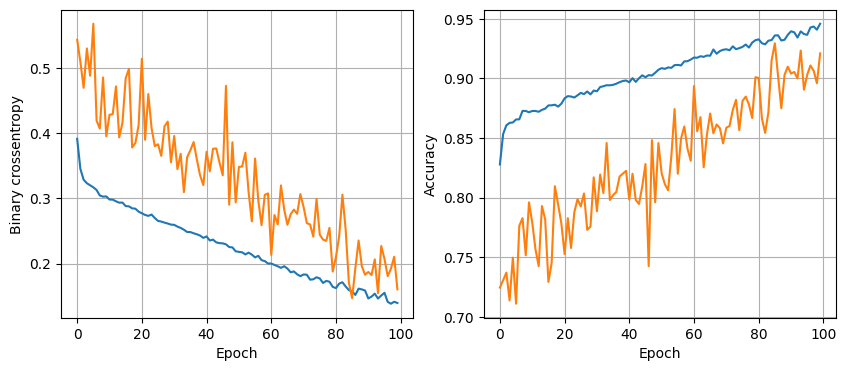

119/119 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.8465
64-nodes | 0-dropout_prob | 0.005-lr | 128-batch size


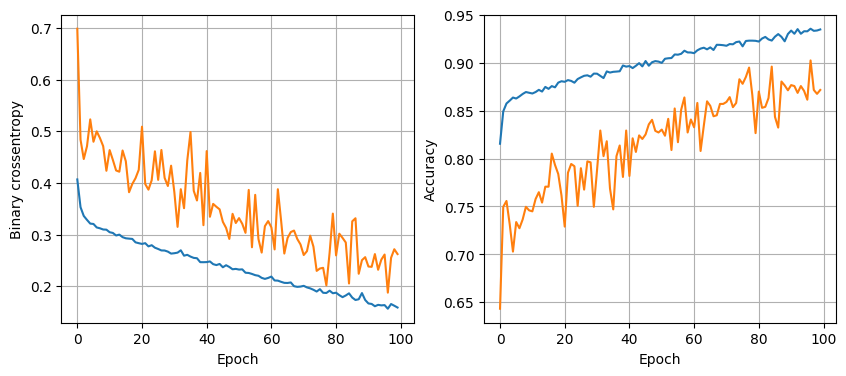

119/119 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8625
64-nodes | 0-dropout_prob | 0.001-lr | 32-batch size


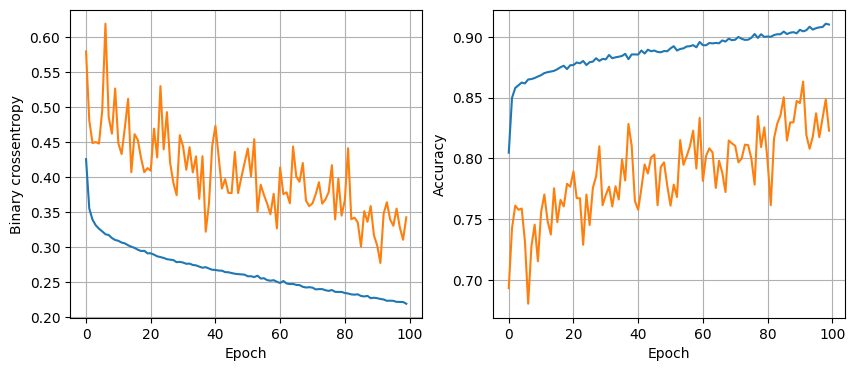

119/119 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8709
64-nodes | 0-dropout_prob | 0.001-lr | 64-batch size


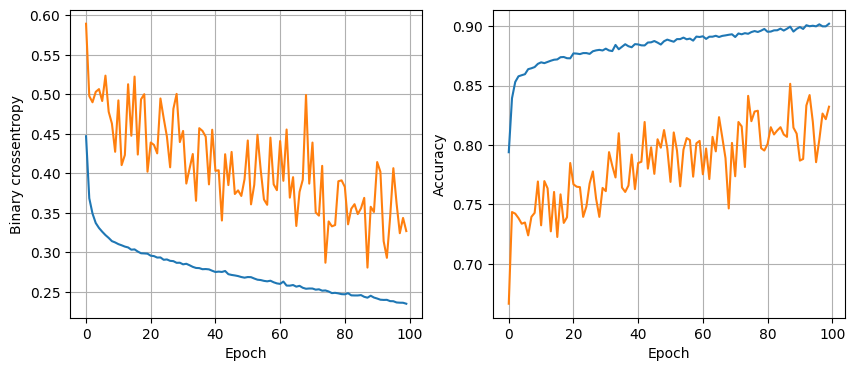

119/119 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8733
64-nodes | 0-dropout_prob | 0.001-lr | 128-batch size


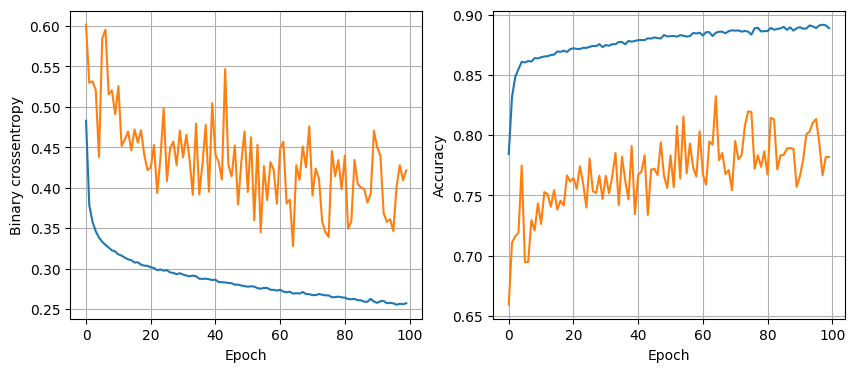

119/119 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8712
64-nodes | 0.2-dropout_prob | 0.01-lr | 32-batch size


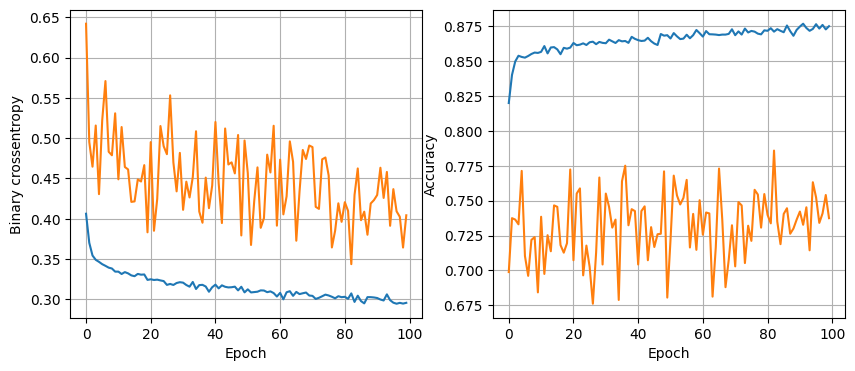

119/119 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8720
64-nodes | 0.2-dropout_prob | 0.01-lr | 64-batch size


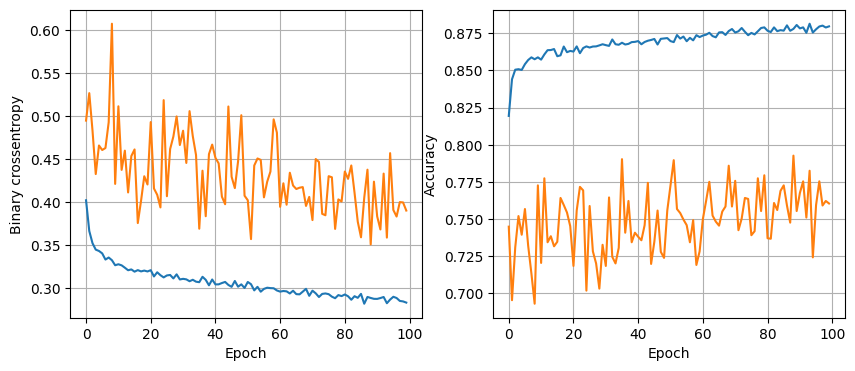

119/119 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8738
64-nodes | 0.2-dropout_prob | 0.01-lr | 128-batch size


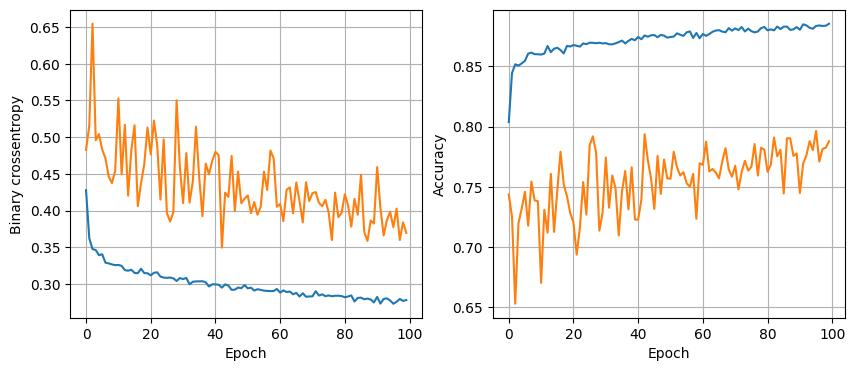

119/119 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8720
64-nodes | 0.2-dropout_prob | 0.005-lr | 32-batch size


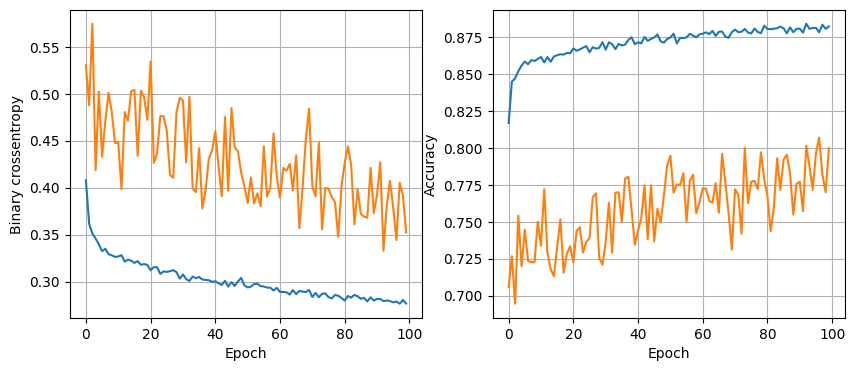

119/119 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.8736
64-nodes | 0.2-dropout_prob | 0.005-lr | 64-batch size


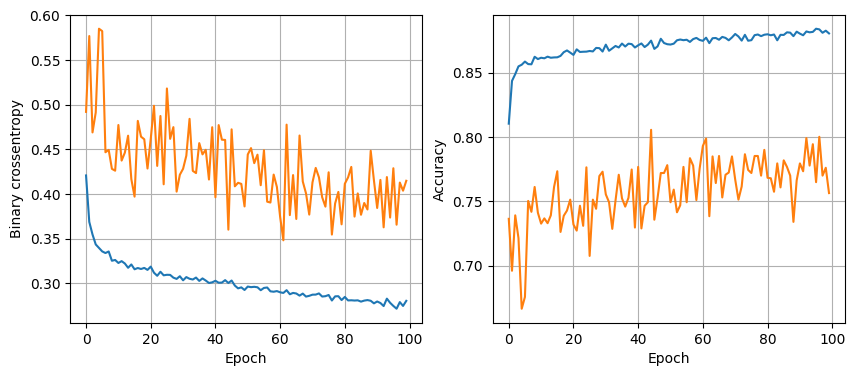

119/119 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.8701
64-nodes | 0.2-dropout_prob | 0.005-lr | 128-batch size


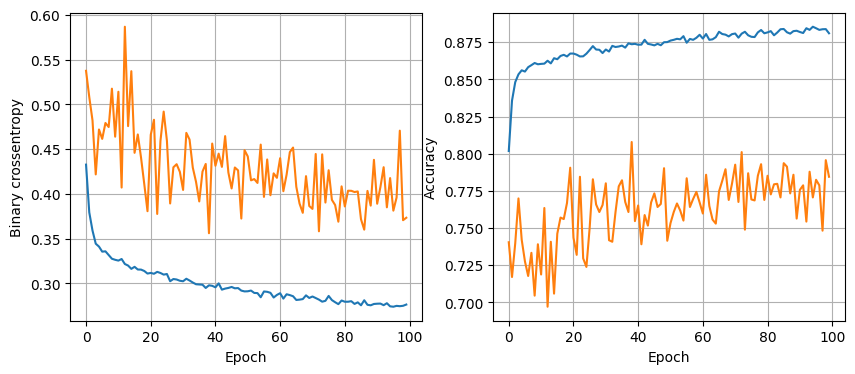

119/119 [==============================] - 1s 4ms/step - loss: 0.2979 - accuracy: 0.8796
64-nodes | 0.2-dropout_prob | 0.001-lr | 32-batch size


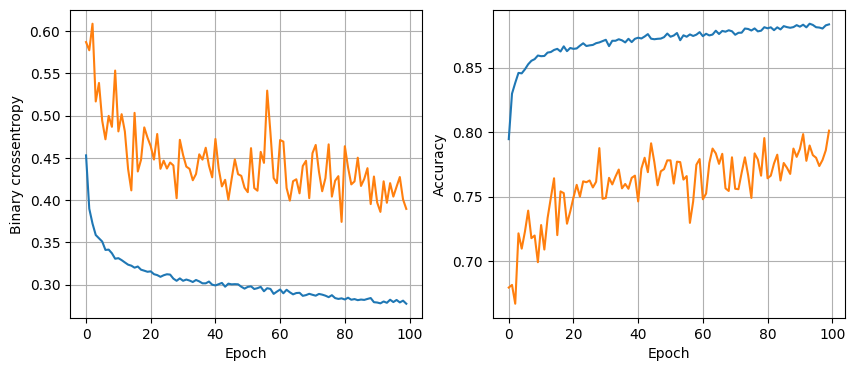

119/119 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8796
64-nodes | 0.2-dropout_prob | 0.001-lr | 64-batch size


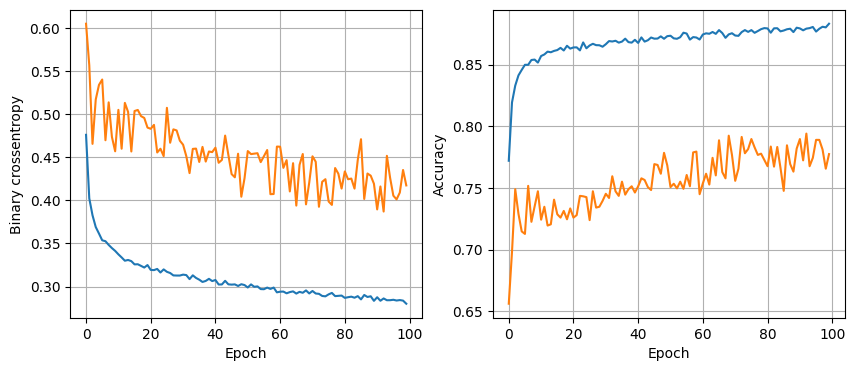

119/119 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8785
64-nodes | 0.2-dropout_prob | 0.001-lr | 128-batch size


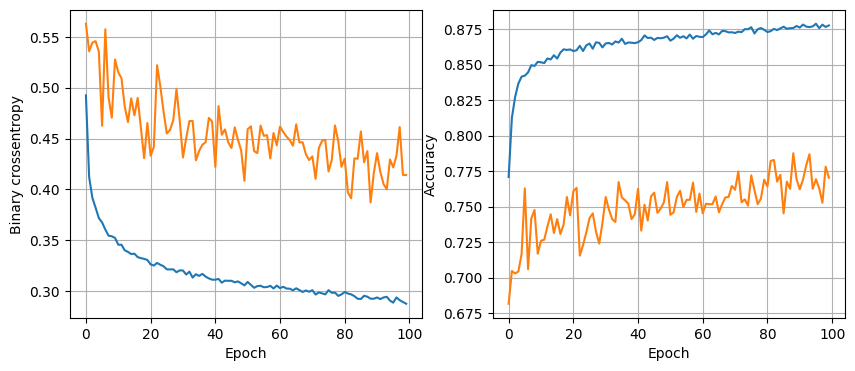

119/119 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8783


In [ ]:
least_val_loss = float("inf")
least_loss_model = None

epochs = 100

for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes}-nodes | {dropout_prob}-dropout_prob | {lr}-lr | {batch_size}-batch size")

        model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

157/157 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred = y_pred.reshape(-1,)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2503
           1       0.80      0.94      0.87      2503

    accuracy                           0.86      5006
   macro avg       0.87      0.86      0.86      5006
weighted avg       0.87      0.86      0.86      5006

